In [2]:
import os
import sys
sys.path.append("../..")
import phage_init

In [3]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x_data2_full.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x_data2_full.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y_data2_full.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y_data2_full.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean_data2_full.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std_data2_full.p"), "rb" ) )

In [4]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [5]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [6]:
mean_di     = mean_total[0:400]
mean_tri    = mean_total[400:8400]
mean_di_sc  = mean_total[8400:8449] 
mean_tri_sc = mean_total[8449:8792]
mean_tt     = mean_total[8792:]

In [7]:
std_di     = std_total[0:400]
std_tri    = std_total[400:8400]
std_di_sc  = std_total[8400:8449] 
std_tri_sc = std_total[8449:8792]
std_tt     = std_total[8792:]

In [8]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [9]:
#print(di_train.shape)
print(tt_train.shape)
train_X =numpy.concatenate((tri_sc_train,tt_train),axis=1)
test_X  =numpy.concatenate((tri_sc_test,tt_test),axis=1)
#train_X=di_train
#test_X=di_test
model_name='tri_sc_p_data2.h5'
print(train_X.shape)
print(test_X.shape)

(50000, 8)
(50000, 351)
(7774, 351)


In [10]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15736375783682890902
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12830207692835526498
physical_device_desc: "device: XLA_CPU device"
]


In [11]:
print(train_X.shape[1])
f_num=train_X.shape[1]


351


In [12]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 351)               123552    
_________________________________________________________________
dropout_1 (Dropout)          (None, 351)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               70400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [13]:
model.fit(train_X, train_Y, epochs=200,verbose=1, batch_size=200)

Epoch 1/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.8887 - acc: 0.7316
Epoch 2/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.5266 - acc: 0.8401
Epoch 3/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.4205 - acc: 0.8697
Epoch 4/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.3517 - acc: 0.8891
Epoch 5/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.3096 - acc: 0.9017
Epoch 6/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.2741 - acc: 0.9121
Epoch 7/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.2461 - acc: 0.9203
Epoch 8/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.2199 - acc: 0.9281
Epoch 9/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.2065 - acc: 0.9320
Epoch 10/200
50000/50000 [==============================] - 3s 61us/step - loss: 0.1894 - a

50000/50000 [==============================] - 3s 65us/step - loss: 0.0475 - acc: 0.9838
Epoch 82/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0475 - acc: 0.9837
Epoch 83/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0459 - acc: 0.9840
Epoch 84/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0454 - acc: 0.9844
Epoch 85/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0487 - acc: 0.9834
Epoch 86/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0467 - acc: 0.9841
Epoch 87/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0461 - acc: 0.9839
Epoch 88/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0464 - acc: 0.9846
Epoch 89/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0459 - acc: 0.9846
Epoch 90/200
50000/50000 [==============================] - 3s 66us/step - loss: 0.0435 - acc: 

50000/50000 [==============================] - 3s 65us/step - loss: 0.0340 - acc: 0.9889
Epoch 161/200
50000/50000 [==============================] - 3s 66us/step - loss: 0.0341 - acc: 0.9888
Epoch 162/200
50000/50000 [==============================] - 3s 66us/step - loss: 0.0355 - acc: 0.9886
Epoch 163/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0316 - acc: 0.9889
Epoch 164/200
50000/50000 [==============================] - 3s 66us/step - loss: 0.0364 - acc: 0.9883
Epoch 165/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0361 - acc: 0.9882
Epoch 166/200
50000/50000 [==============================] - 3s 66us/step - loss: 0.0344 - acc: 0.9883
Epoch 167/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0335 - acc: 0.9887
Epoch 168/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.0347 - acc: 0.9886
Epoch 169/200
50000/50000 [==============================] - 3s 65us/step - loss: 0.034

In [14]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7774/7774 [==============================] - 1s 85us/step
Accuracy: 89.50%


In [15]:
#you can save the as a file so you dont have to train it every time
model.save( os.path.join(phage_init.model_dir,model_name))

In [16]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.93      0.92      0.93      1836
     Minor capsid       0.76      0.50      0.60       105
        Baseplate       0.90      0.84      0.87       308
       Major tail       0.85      0.88      0.86       423
       Minor tail       0.87      0.81      0.84       499
           Portal       0.92      0.94      0.93      2473
       Tail fiber       0.72      0.70      0.71       412
       Tail shaft       0.94      0.92      0.93       677
           Collar       0.70      0.72      0.71       149
Head-Tail joining       0.87      0.92      0.90       892

        micro avg       0.90      0.90      0.90      7774
        macro avg       0.85      0.82      0.83      7774
     weighted avg       0.89      0.90      0.89      7774



In [17]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({5: 2473, 0: 1836, 9: 892, 7: 677, 4: 499, 3: 423, 6: 412, 2: 308, 8: 149, 1: 105})
[1836, 105, 308, 423, 499, 2473, 412, 677, 149, 892]



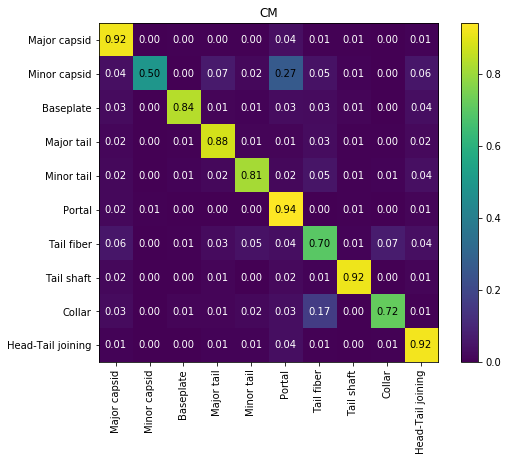

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.show()